In [1]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# GARCH(2,2) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [3]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

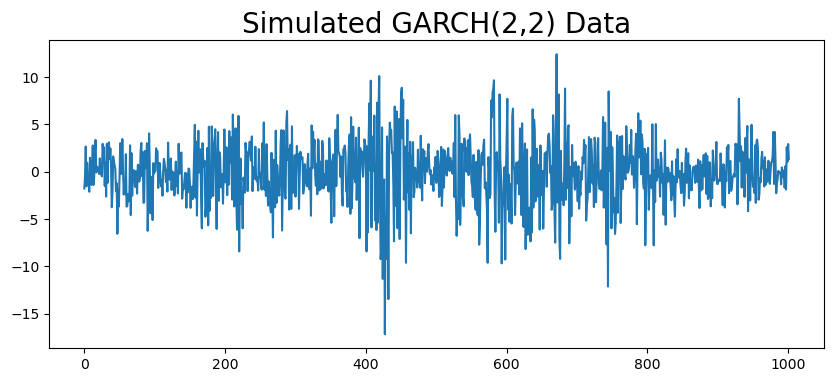

In [4]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

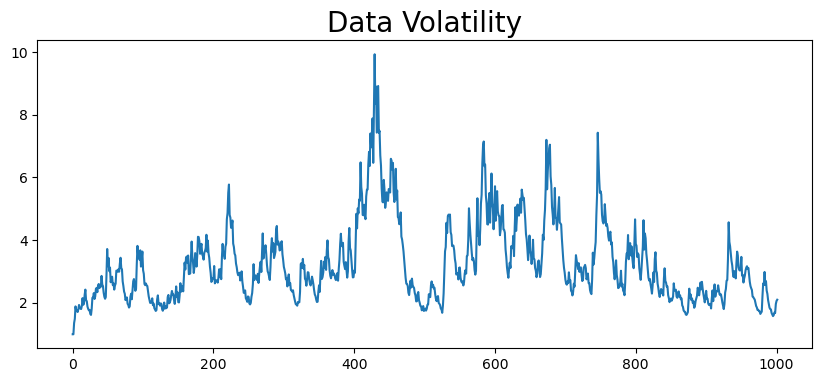

In [5]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

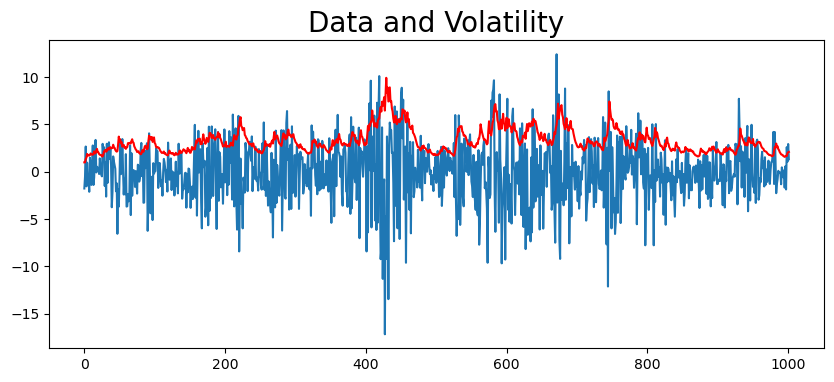

In [6]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

# PACF Plot

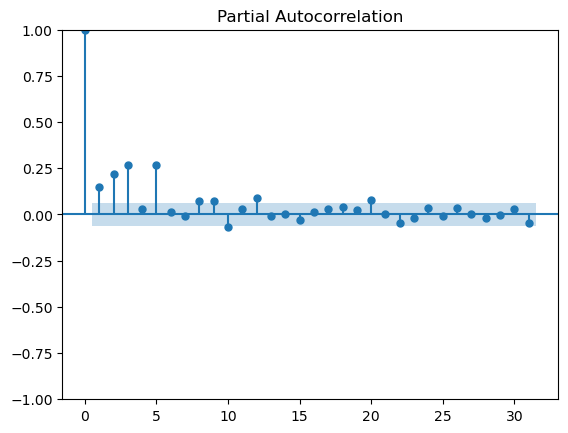

In [8]:
plot_pacf(np.array(series)**2)
plt.show()

# Fit the GARCH Model

In [10]:
train, test = series[:-test_size], series[-test_size:]

In [11]:
model = arch_model(train, p=2, q=2)

In [12]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2675.5595705793503
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2845.3384169952174
Iteration:      3,   Func. Count:     28,   Neg. LLF: 3299.360283242404
Iteration:      4,   Func. Count:     37,   Neg. LLF: 2791.900551916826
Iteration:      5,   Func. Count:     46,   Neg. LLF: 2276.8909156375485
Iteration:      6,   Func. Count:     54,   Neg. LLF: 2265.3677965046872
Iteration:      7,   Func. Count:     62,   Neg. LLF: 2264.6503884557405
Iteration:      8,   Func. Count:     70,   Neg. LLF: 2263.493514810537
Iteration:      9,   Func. Count:     78,   Neg. LLF: 2263.0451759098387
Iteration:     10,   Func. Count:     85,   Neg. LLF: 2263.0401542199193
Iteration:     11,   Func. Count:     92,   Neg. LLF: 2263.0399622658724
Iteration:     12,   Func. Count:     99,   Neg. LLF: 2263.039959385575
Iteration:     13,   Func. Count:    105,   Neg. LLF: 2263.0399593859665
Optimization terminated successfully    (Exit mode 0)
 

In [13]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2263.04
Distribution:                  Normal   AIC:                           4538.08
Method:            Maximum Likelihood   BIC:                           4566.91
                                        No. Observations:                  902
Date:                Fri, Apr 25 2025   Df Residuals:                      901
Time:                        20:31:44   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.1176  8.742e-02     -1.345      0.179 [ -0.289,5.373e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.4360      0.158      2.760  5.774e-03   [  0.126,  0.746]
alpha[1]       0.0920  4.596e-02      2.002  4.524e-02 [1.950e-03,  0.182]
alpha[2]       0.1162  5.580e-02      2.082  3.731e-02 [6.831e-03,  0.226]
beta[1]        0.6270      0.159      3.939  8.183e-05   [  0.315,  0.939]
beta[2]        0.1302      0.128      1.014      0.311   [ -0.122,  0.382]
==========================================================================

Covariance estimator: robust
"""

# Predict

In [15]:
predictions = model_fit.forecast(horizon=test_size)

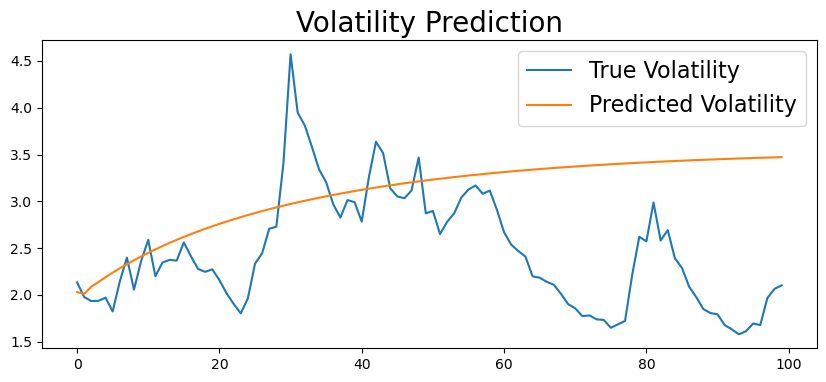

In [16]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

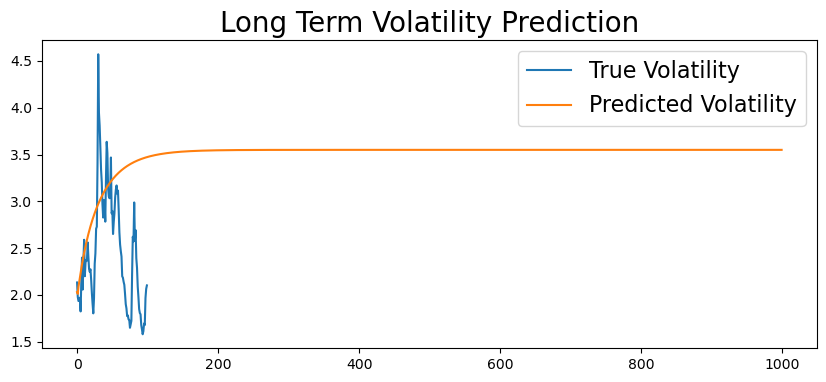

In [17]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Rolling Forecast Origin

In [19]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

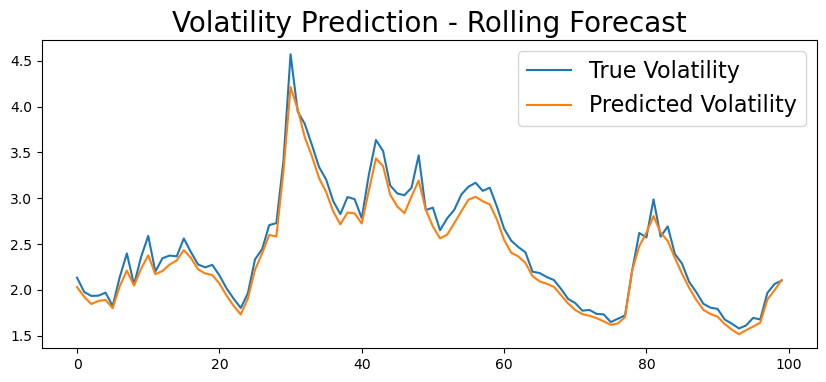

In [20]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)